In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
df = pd.read_csv("eda_data.csv")
df.head(5)

## choose columns

In [4]:
df.columns 
#hyper parametr tunning using grid search

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hour', 'EMP prov salary', 'min_salary', 'max_salary', 'avg_salary',
       'Company_txt', 'State', 'same_state', 'age', 'python_job', 'spark_job',
       'aws_job', 'excel_job', 'R_job', 'job_par', 'job_rank', 'job_desc_len',
       'Competitors_count'],
      dtype='object')

In [5]:
df_model = df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','Competitors_count','hour','State','EMP prov salary','same_state','age','python_job', 'spark_job',
       'aws_job', 'excel_job','job_par', 'job_rank','job_desc_len']]

### Get dummy variables

In [6]:
df_dummies = pd.get_dummies(df_model)

In [12]:
pd.set_option('display.max_columns', None)
df_dummies.head()
df_dummies.size

132076

In [5]:
X = df_dummies.drop('avg_salary', axis = 1)
y = df_dummies.avg_salary.values

### Train test split

In [6]:
import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Linear regression

In [15]:
import dill
dill.dump_session('model_building.db')

In [1]:
import dill
dill.load_session('model_building.db')

In [11]:
import dill
dill.load_session('model_building.db')

In [ ]:
import dill
dill.load_session('model_building.db')

In [ ]:
y_train[:10]

In [8]:
import statsmodels.api as sm

x_sm = X = sm.add_constant(X)
model = sm.OLS(y,x_sm)
results = model.fit()

C:\Users\Sashank\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [9]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     10.23
Date:                Fri, 07 Aug 2020   Prob (F-statistic):           1.17e-94
Time:                        11:43:11   Log-Likelihood:                -3311.3
No. Observations:                 742   AIC:                             6909.
Df Residuals:                     599   BIC:                             7568.
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [10]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
np.mean(cross_val_score(lm,X_train,y_train,scoring='neg_mean_absolute_error', cv = 3))

-67931514.67124747

## Lasso Reg

In [13]:
from sklearn.linear_model import Lasso

In [32]:
Lso_reg = Lasso(alpha  = 0.18)
Lso_reg.fit(X_train,y_train)
np.mean(cross_val_score(Lso_reg,X_train,y_train,scoring='neg_mean_absolute_error', cv = 3))

-19.267533935490054

In [15]:
import matplotlib.pyplot as plt

alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha = i/100)
    error.append(np.mean(cross_val_score(lml,X_train,y_train,scoring='neg_mean_absolute_error', cv = 3)))
    


C:\Users\Sashank\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 648.0446903533884, tolerance: 57.22447398989902
  positive)


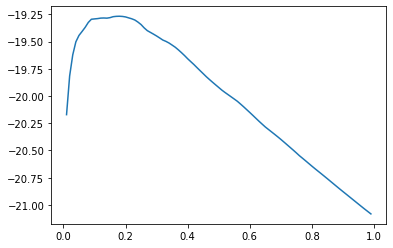

In [16]:
plt.plot(alpha,error)

In [17]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err,columns =['alpha','error'])

In [18]:
df_err[df_err.error== max(df_err.error)]

,alpha,error
17,0.18,-19.267534


In [ ]:
import dill
dill.load_session('model_building.db')

In [2]:
import dill
dill.load_session('model_building.db')

## Random Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor
Rf = RandomForestRegressor()

In [20]:
from sklearn.model_selection import cross_val_score

In [22]:
np.mean(cross_val_score(Rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv = 10))

C:\Users\Sashank\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Sashank\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Sashank\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Sashank\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Sashank\Anaconda3\lib\site-packages\sklearn\ensemble\forest

-13.853878531073445

In [23]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators' : range(10,300,10), 'criterion' : ['mse','mae'], 'max_features' : ('auto','sqrt','log2')}

In [26]:
gscv = GridSearchCV(Rf, parameters, scoring= 'neg_mean_absolute_error', cv= 3)

In [27]:
gscv.fit(X_train,y_train)

C:\Users\Sashank\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'],
  

In [28]:
gscv.best_score_

-14.80204769934955

In [29]:
gscv.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=210,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [33]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
pred_LR = LR.predict(X_test)
pred_LS = Lso_reg.predict(X_test)
pred_RF = gscv.best_estimator_.predict(X_test)

In [35]:
from sklearn.metrics import mean_absolute_error

In [37]:
mean_absolute_error(y_test,pred_LR)

18.955175498290167

In [38]:
mean_absolute_error(y_test,pred_LS)

19.972354712465243

In [39]:
mean_absolute_error(y_test,pred_RF)

11.416323106423777

In [40]:
import dill
dill.dump_session('Model_Building.db')

In [44]:
import pickle
pickl = {'model' : gscv.best_estimator_}
pickle.dump(pickl, open('model_file' + ".p", "wb"))

In [45]:
file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

In [49]:
model.predict(X_test.iloc[1,:].values.reshape(1,-1))

array([53.75])